# ***General Code***



$min_xf(\mathbf{x}) = \frac {1}{2}{||Ax-y||}^2_2 
\quad$

Our objective is to minimize this loss function which is the ordinary least square. We proceed as follows

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
random.seed(1000)

In [ ]:
def evalf(A,x,y,n_feat, n):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0

  f = np.matmul(A,x) - y

  return 0.5*(np.linalg.norm(f))**2


def evalg(A,x,y,n_feat, n):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0

  d = np.matmul(A,x) - y
  g = np.matmul(A.T , d)

  return g



def evalh(A,x,y,n_feat, n):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0

  h = np.matmul(A.T , A)

  return h


In [ ]:
def compute_steplength_backtracking_scaled_direction(A,x,y, n_feat, n ,gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(gradf) is np.ndarray and gradf.shape == (n_feat,1)
  assert type(direction) is np.ndarray and direction.shape == (n_feat, n_feat)
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 

  alpha = alpha_start
  p = -gradf

  while (evalf(A, x + alpha*np.matmul(direction,p), y, n_feat, n) > (evalf(A,x,y,n_feat,n) + gamma * alpha * np.matmul(gradf.T, np.matmul(direction, p))) ):
    alpha = alpha*rho
 
  return alpha


#line search type 
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH = 2
EXACT_LINE_SEARCH = 1



def find_minimizer_Newtonmethod(A, start_x, y, n_feat,  n, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(start_x) is np.ndarray and start_x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(A,x,y,n_feat,n)
  

  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    elif len(args)<3 :
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])
  k = 0
  x_k = []
  
  #print('iter:',k,  ' f(x):', evalf(x,n), ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol):

    d = np.linalg.inv(evalh(A,x,y,n_feat,n))

    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(A,x,y,n_feat,n,g_x, d , alpha_start,rho, gamma)
 
    elif line_search_type == CONSTANT_STEP_LENGTH: 
      step_length = 1.0
 
    else:  
      raise ValueError('Line search type unknown. Please check!')
 
    x = np.subtract(x, step_length * np.matmul(d,g_x)) 
    k += 1 
    x_k.append(x)
    g_x = evalg(A,x,y,n_feat,n)
  
  return x, k, x_k



def find_minimizer_BGFS(A, start_x, y, n_feat, n, tol,line_search_type,*args):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(start_x) is np.ndarray and start_x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0
  assert type(tol) is float and tol>=0 


  x = start_x
  k = 0
  g_new = evalg(A,x,y,n_feat,n)
  B = np.identity(n_feat)
  x_k = []  

  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    elif len(args)<3 :
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  while (np.linalg.norm(g_new) > tol):

    d = B

    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(A,x,y,n_feat,n ,g_new, d , alpha_start,rho, gamma)
 
    elif line_search_type == CONSTANT_STEP_LENGTH: 
      step_length = 1.0
 
    else:  
      raise ValueError('Line search type unknown. Please check!')
      
    g_old = evalg(A,x,y,n_feat,n)
    p = np.matmul(-1*B, g_old)
    x = x + step_length * p
    s = step_length * p
    g_new = evalg(A,x,y,n_feat,n)
    y_k = g_new - g_old

    mu = 1 / (np.matmul(y_k.T,s))
    term1 = np.identity(n_feat) - mu * np.matmul(s,y_k.T)
    term2 = np.identity(n_feat) - mu * np.matmul(y_k, s.T)

    B = np.matmul(term1, np.matmul(B ,term2))  +  mu * np.matmul(s,s.T)
    
    k = k + 1
    x_k.append(x)
    

  return x, k, x_k



# Preparing data 

In [ ]:
p = 2
n_sample = 800

A = random.randn(n_sample, p)
x_bar = np.zeros((p,1))

x_bar[0] = random.uniform(-4.0, -2.0)
x_bar[1] = random.uniform(6.0, 8.0)

e = random.rand(n_sample, 1)

y = np.matmul(A,x_bar) + e


#Part 2 : *Newton's Method with Backtracking line search*


$\textbf{Finding the optimal value of x that minimizes our problem}$

In [ ]:
my_x = np.array([0,0]).reshape((p, 1))
my_tol = 10e-5
alpha = 0.9
rho = 0.5
gamma = 0.5

x_opt , k_opt , x_k_arr = find_minimizer_Newtonmethod(A, my_x, y, p, n_sample, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)


print('Using newtons method with Backtracking :- ')
print('\n')

print('Optimal Value of x :', x_opt.T)
print('Original x_bar :', x_bar.T)
print('Value at optimum x :', evalf(A,x_opt,y,p,n_sample))
print('No. of iterations :', k_opt)



Using newtons method with Backtracking :- 


Optimal Value of x : [[-3.76902355  7.16606802]]
Original x_bar : [[-3.77641785  7.1735924 ]]
Value at optimum x : 132.31514727496892
No. of iterations : 8


***Remarks :*** *This is a regression problem where we have been given a function y which depend on x. The original value or the paramerter is x_bar. Here in this problem we are trying to estimate that parameter as best as possible. for that we try to minimize the square erros loss function that is the f(x) in our case to find the weights x such that we estimate it as close as possible.*

*The observation is that we estimated the value of x, and it lies very close to the true value x_bar.*

$\textbf{Plot}$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Text(0.5, 0, 'k')

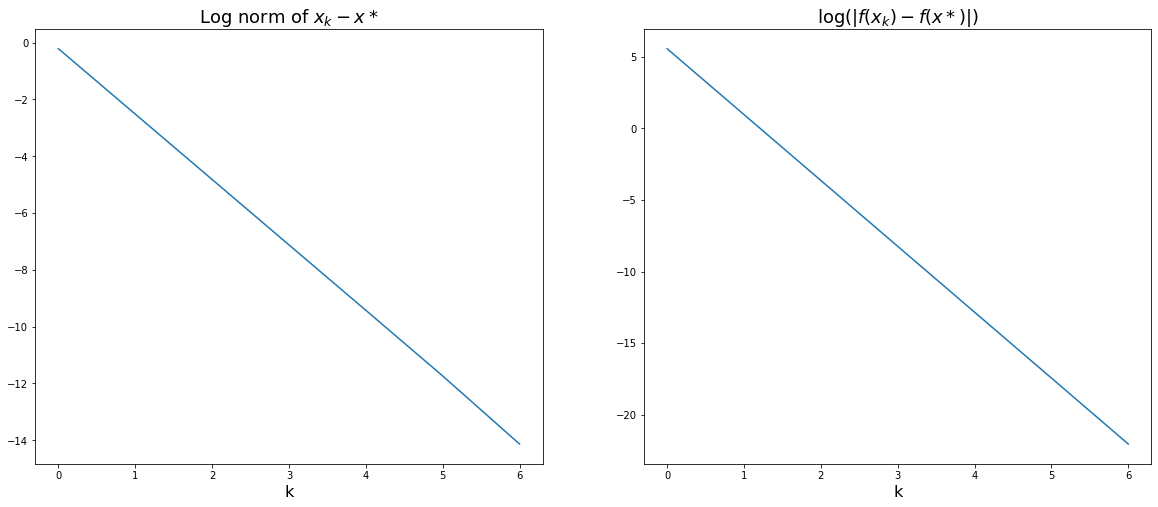

In [ ]:

log_norm = []
log_norm_fx = []

for xk in x_k_arr:
  log_norm.append(np.log(np.linalg.norm(xk - x_opt)))
  log_norm_fx.append(np.log(np.abs(evalf(A,xk,y,p,n_sample) - evalf(A,x_opt,y,p,n_sample) )))


fig, ax = plt.subplots(1,2,figsize= (20,8))
ax[0].plot(np.arange(len(x_k_arr)),log_norm, label='$Log-Norm(x-x*)$')
ax[0].set_title('Log norm of $x_k - x*$', fontsize = 18)
ax[0].set_xlabel('k', fontsize = 16)

ax[1].plot(np.arange(len(x_k_arr)),log_norm_fx, label='$\log(|f(x_k) - f(x*)|)$')
ax[1].set_title('$\log(|f(x_k) - f(x*)|)$', fontsize = 18)
ax[1].set_xlabel('k', fontsize = 16)


***Remarks :*** *We observe that the convergence is linear as the line shows*

# Part 3 : *BFGS Method with backtracking line search*

$\textbf{Finding the optimal value of x that minimizes our problem}$

In [ ]:
my_x = np.array([0,0]).reshape((2, 1))
my_tol = 10e-5
alpha = 0.9
rho = 0.5
gamma = 0.5

x_opt , k_opt , x_k_arr = find_minimizer_BGFS(A, my_x, y, 2, 800, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)


print('Using BGFS method with Backtracking :- ')
print('\n')

print('Optimal Value of x :', x_opt.T)
print('Original x_bar :', x_bar.T)
print('Value at optimum x :', evalf(A,x_opt,y,p,n_sample))
print('No. of iterations :', k_opt)



Using BGFS method with Backtracking :- 


Optimal Value of x : [[-3.76902354  7.166068  ]]
Original x_bar : [[-3.77641785  7.1735924 ]]
Value at optimum x : 132.31514727497066
No. of iterations : 10


$\textbf{Plot}$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Text(0.5, 0, 'k')

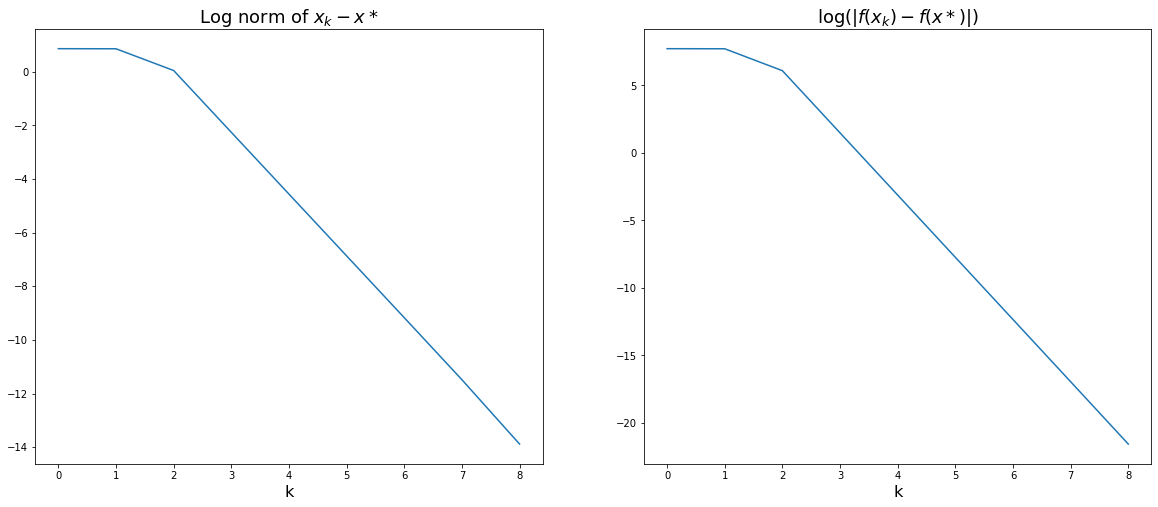

In [ ]:

log_norm = []
log_norm_fx = []

for xk in x_k_arr:
  log_norm.append(np.log(np.linalg.norm(xk - x_opt)))
  log_norm_fx.append(np.log(np.abs(evalf(A,xk,y,p,n_sample) - evalf(A,x_opt,y,p,n_sample) )))


fig, ax = plt.subplots(1,2,figsize= (20,8))
ax[0].plot(np.arange(len(x_k_arr)),log_norm, label='$Log-Norm(x-x*)$')
ax[0].set_title('Log norm of $x_k - x*$', fontsize = 18)
ax[0].set_xlabel('k', fontsize = 16)

ax[1].plot(np.arange(len(x_k_arr)),log_norm_fx, label='$\log(|f(x_k) - f(x*)|)$')
ax[1].set_title('$\log(|f(x_k) - f(x*)|)$', fontsize = 18)
ax[1].set_xlabel('k', fontsize = 16)


***Remarks :*** *Number of iterations taken by BFGS is more than the newtons methids, we have used backtracking line search algorith in both the problems.We also observe that the rate of convergence was linear decreasing in newtons methos but in bfgs we seea a small curva before falling*